In [ ]:
import pandas as pd
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt
import statistics
import seaborn as sns
# from google.colab import drive

In [ ]:
# drive.mount('/content/drive/')
# path_excel = '/content/drive/MyDrive/SNA - WS24/scaled_data_with_nan.csv'
# original_data = pd.read_csv('scaled_data_with_nan.csv')
# original_data = pd.read_csv(path_excel)

# data_path = os.path.join('D:\\', 'sna')

# clear_scaled_data = pd.read_csv(os.path.join(data_path, 'clear_scaled_data.csv'))
# clear_data = pd.read_csv(os.path.join(data_path, 'clear_data.csv'))
# data_with_nan = pd.read_csv(os.path.join(data_path, 'data_with_nan.csv'))
# scaled_data_with_nan = pd.read_csv(os.path.join(data_path, 'scaled_data_with_nan.csv'))

data_path = "../data/"
scaled_data_with_nan_path = data_path + "scaled_data_with_nan.csv"
original_data = pd.read_csv(scaled_data_with_nan_path)



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
original_data['Votes'] = original_data['VotePositive'] + original_data['VoteNegative']

In [ ]:
print(original_data['Votes'].sum())
print(original_data['VotePositive'].sum())

8144.31379476766
4064.1687170474515


## Distribution Plots

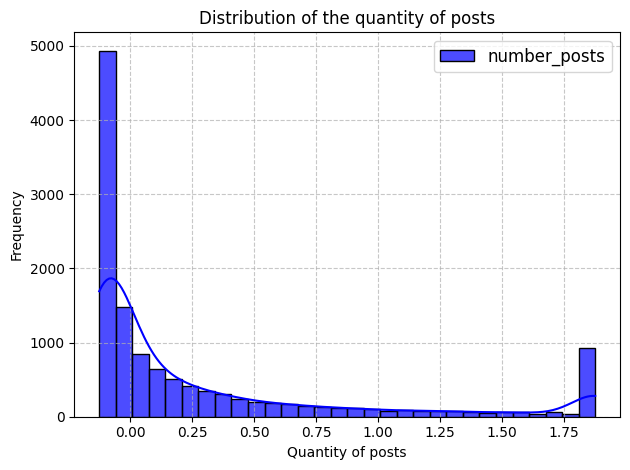

In [ ]:
number_posts = original_data['PostsAmount'].to_numpy()
plt.figure()

sns.histplot(number_posts, kde=True, bins=30, color='blue', alpha=0.7, label='number_posts')

plt.title('Distribution of the quantity of posts', fontsize=12)
plt.xlabel('Quantity of posts', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


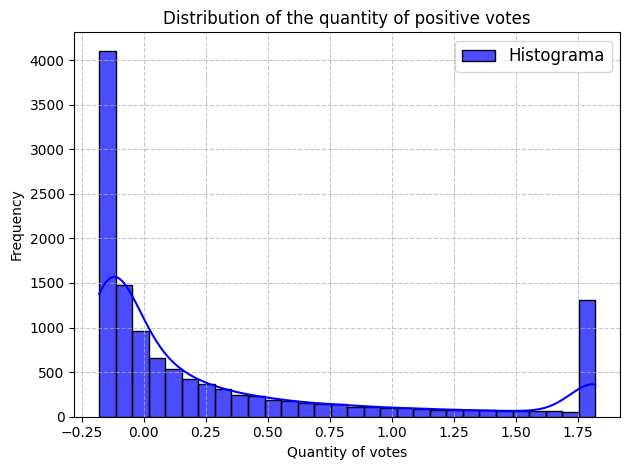

In [ ]:
plt.figure()

sns.histplot(original_data['VotePositive'].to_numpy(), kde=True, bins=30, color='blue', alpha=0.7, label='Histograma')

plt.title('Distribution of the quantity of positive votes', fontsize=12)
plt.xlabel('Quantity of votes', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

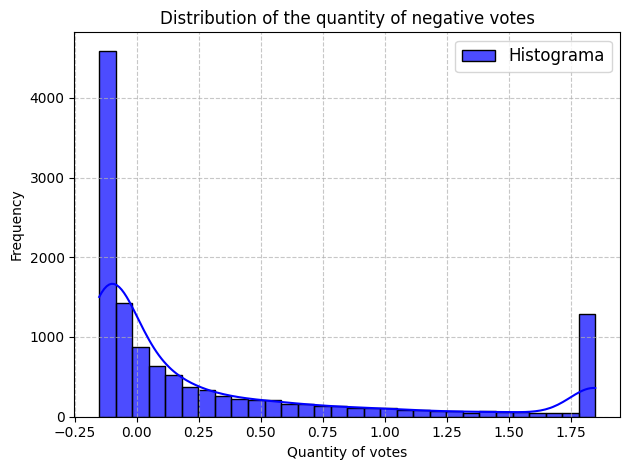

In [ ]:
plt.figure()

sns.histplot(original_data['VoteNegative'].to_numpy(), kde=True, bins=30, color='blue', alpha=0.7, label='Histograma')

plt.title('Distribution of the quantity of negative votes', fontsize=12)
plt.xlabel('Quantity of votes', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

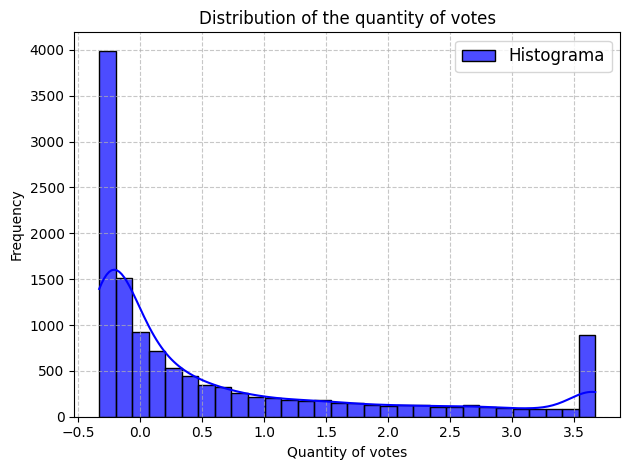

In [ ]:
plt.figure()

sns.histplot(original_data['Votes'].to_numpy(), kde=True, bins=30, color='blue', alpha=0.7, label='Histograma')

plt.title('Distribution of the quantity of votes', fontsize=12)
plt.xlabel('Quantity of votes', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

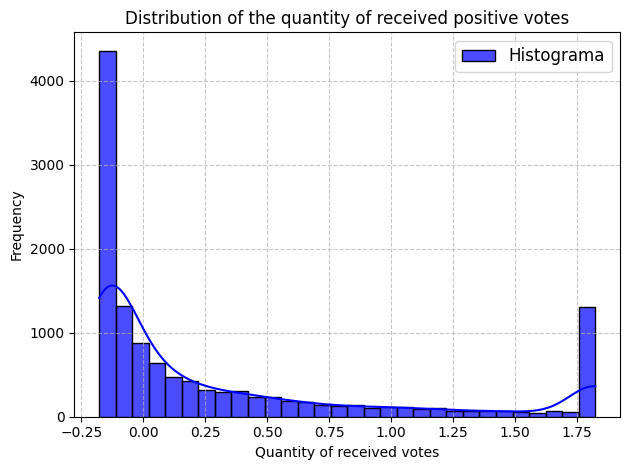

In [ ]:
plt.figure()

sns.histplot(original_data['ReceivedPositive'].to_numpy(), kde=True, bins=30, color='blue', alpha=0.7, label='Histograma')

plt.title('Distribution of the quantity of received positive votes', fontsize=12)
plt.xlabel('Quantity of received votes', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

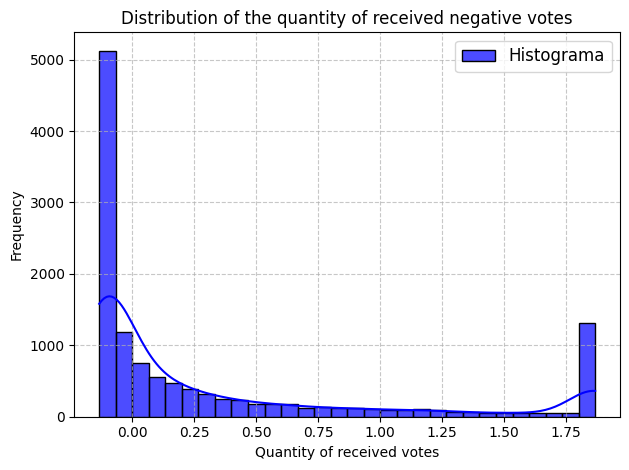

In [ ]:
plt.figure()

sns.histplot(original_data['ReceivedNegative'].to_numpy(), kde=True, bins=30, color='blue', alpha=0.7, label='Histograma')

plt.title('Distribution of the quantity of received negative votes', fontsize=12)
plt.xlabel('Quantity of received votes', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

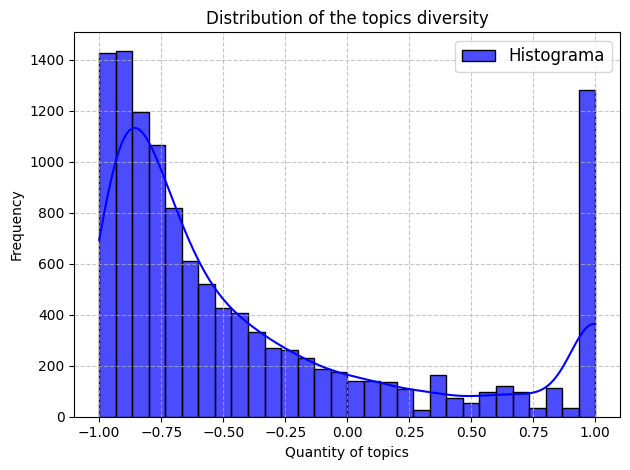

In [ ]:
plt.figure()

sns.histplot(original_data['TopicsDiversity'].to_numpy(), kde=True, bins=30, color='blue', alpha=0.7, label='Histograma')

plt.title('Distribution of the topics diversity', fontsize=12)
plt.xlabel('Quantity of topics', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

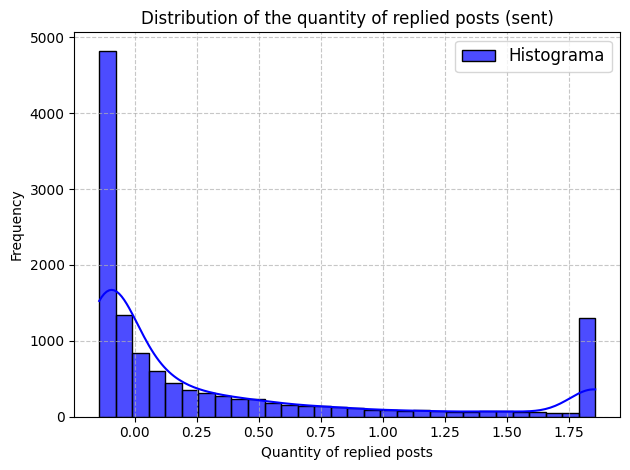

In [ ]:
plt.figure()

sns.histplot(original_data['PostReplied'].to_numpy(), kde=True, bins=30, color='blue', alpha=0.7, label='Histograma')

plt.title('Distribution of the quantity of replied posts (sent)', fontsize=12)
plt.xlabel('Quantity of replied posts', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Assign Ranges to features.

In [ ]:
def calculate_percentile_thresholds(df, columns, low_percentile=0.3, high_percentile=0.7):
    """
    Calculates thresholds for Low, Medium, and High based on percentiles.

    Args:
    - df: DataFrame containing the features.
    - columns: List of columns to analyze.
    - low_percentile: Percentile threshold for Low/Medium separation.
    - high_percentile: Percentile threshold for Medium/High separation.

    Returns:
    - Dictionary with thresholds {column: (low_threshold, high_threshold)}.
    """
    thresholds = {}
    for column in columns:
        # Handle NaN values by replacing them with the median
        column_data = df[column].fillna(df[column].median())

        # Calculate percentiles
        low_threshold = np.percentile(column_data, low_percentile * 100)
        high_threshold = np.percentile(column_data, high_percentile * 100)

        thresholds[column] = (low_threshold, high_threshold)

    return thresholds


def categorize_automatically(df, thresholds):
    """
    Automatically categorizes columns based on the calculated thresholds.
    """
    categories = df.copy()
    for column, (low, high) in thresholds.items():
        categories[column + '_Category'] = pd.cut(
            df[column],
            bins=[-np.inf, low, high, np.inf],
            labels=['Low', 'Medium', 'High']
        )
    return categories


def create_range_table(thresholds):
    """
    Creates a table with features and their ranges categorized as Low, Medium, and High.

    Args:
    - thresholds: Dictionary with thresholds {feature: (low_threshold, high_threshold)}.

    Returns:
    - DataFrame with features and their categorized ranges.
    """
    data = []
    for feature, (low_threshold, high_threshold) in thresholds.items():
        data.append({
            "Feature": feature,
            "Low Range": f"(-∞, {low_threshold:.2f}]",
            "Medium Range": f"({low_threshold:.2f}, {high_threshold:.2f}]",
            "High Range": f"({high_threshold:.2f}, ∞)"
        })

    return pd.DataFrame(data)


# All features to analyze
all_features = [
    'clicks_in_last_90_articles', 'ActivityCentrality', 'ReceivedNegative',
    'ReceivedPositive', 'VoteNegative', 'VotePositive', 'Votes',
    'PostReplied', 'UserFollowed', 'GotPostReplied', 'GotFollowers',
    'PostsAmount', 'TopicsPostedIn', 'TopicsDiversity'
]

# Calculate percentile-based thresholds for all features
percentile_thresholds = calculate_percentile_thresholds(original_data, all_features)

# Create the range table
range_table = create_range_table(percentile_thresholds)

# Display the table
print("Feature Range Table:")
print(range_table)

Feature Range Table:
                       Feature    Low Range    Medium Range  High Range
0   clicks_in_last_90_articles  (-∞, -0.25]   (-0.25, 0.34]   (0.34, ∞)
1           ActivityCentrality  (-∞, -0.25]   (-0.25, 0.46]   (0.46, ∞)
2             ReceivedNegative  (-∞, -0.11]   (-0.11, 0.33]   (0.33, ∞)
3             ReceivedPositive  (-∞, -0.13]   (-0.13, 0.37]   (0.37, ∞)
4                 VoteNegative  (-∞, -0.11]   (-0.11, 0.32]   (0.32, ∞)
5                 VotePositive  (-∞, -0.12]   (-0.12, 0.34]   (0.34, ∞)
6                        Votes  (-∞, -0.21]   (-0.21, 0.74]   (0.74, ∞)
7                  PostReplied  (-∞, -0.10]   (-0.10, 0.34]   (0.34, ∞)
8                 UserFollowed   (-∞, 0.00]    (0.00, 0.00]   (0.00, ∞)
9               GotPostReplied  (-∞, -0.13]   (-0.13, 0.36]   (0.36, ∞)
10                GotFollowers   (-∞, 0.00]    (0.00, 0.17]   (0.17, ∞)
11                 PostsAmount  (-∞, -0.09]   (-0.09, 0.27]   (0.27, ∞)
12              TopicsPostedIn  (-∞, -0.27]

## Role: Opinion Leader

In [ ]:
# HIGH FEATURES

high_impact_ranges = range_table[["Feature", "High Range"]]
high_impact_ranges.rename(columns={"High Range": "Impact (High)"}, inplace=True)

opinion_leader_high_features = ["VotePositive", "ActivityCentrality", "ReceivedPositive"]
high_filtered_ranges = high_impact_ranges[high_impact_ranges["Feature"].isin(opinion_leader_high_features)]

display(high_filtered_ranges)

# MEDIUM FEATURES

medium_impact_ranges = range_table[["Feature", "Medium Range"]]
medium_impact_ranges.rename(columns={"Medium Range": "Impact (Medium)"}, inplace=True)

opinion_leader_medium_features = ["GotFollowers"]
medium_filtered_ranges = medium_impact_ranges[medium_impact_ranges["Feature"].isin(opinion_leader_medium_features)]

display(medium_filtered_ranges)

low_impact_ranges = range_table[["Feature", "Low Range"]]
low_impact_ranges.rename(columns={"Low Range": "Impact (Low)"}, inplace=True)

opinion_leader_low_features = ["TopicsDiversity"]
low_filtered_ranges = low_impact_ranges[low_impact_ranges["Feature"].isin(opinion_leader_low_features)]

display(low_filtered_ranges)

# FILTER USERS

# Automatically generate conditions based on High, Medium and Low ranges
high_conditions = [
    (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
    for feature in opinion_leader_high_features
]

medium_conditions = [
    (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'Medium Range'].str.extract(r'\((.*?),')[0])) &
    (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Medium Range'].str.extract(r',(.*?)\]')[0]))
    for feature in opinion_leader_medium_features
]

# Automatically generate conditions based on low ranges
low_conditions = [
    (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Low Range'].str.extract(r',(.*?)\]')[0]))
    for feature in opinion_leader_low_features
]

# Combine the conditions to filter users
filtered_users = original_data[
    high_conditions[0] & high_conditions[1] & high_conditions[2] &
    medium_conditions[0] &
    low_conditions[0]
]

# Display the filtered users
display(filtered_users)
print(f"The number of users is {len(filtered_users)}")

## Role: Taciturns

In [ ]:
# LOW FEATURES

low_impact_ranges = range_table[["Feature", "Low Range"]]
low_impact_ranges.rename(columns={"Low Range": "Impact (Low)"}, inplace=True)

taciturn_low_features = ["PostsAmount", "Votes", "clicks_in_last_90_articles", "ActivityCentrality"]
low_filtered_ranges = low_impact_ranges[low_impact_ranges["Feature"].isin(taciturn_low_features)]

display(low_filtered_ranges)


# FILTER USERS

# Automatically generate conditions based on low ranges
low_conditions = [
    (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Low Range'].str.extract(r',(.*?)\]')[0]))
    for feature in taciturn_low_features
]


# Combine the conditions to filter users
filtered_users = original_data[
    low_conditions[0] & low_conditions[1] & low_conditions[2] & low_conditions[3]
]

# Display the filtered users
display(filtered_users)
print(f"The number of users is {len(filtered_users)}")

<ipython-input-176-d0bf087938f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_impact_ranges.rename(columns={"Low Range": "Impact (Low)"}, inplace=True)


,Feature,Impact (Low)
0,clicks_in_last_90_articles,"(-∞, -0.25]"
1,ActivityCentrality,"(-∞, -0.25]"
6,Votes,"(-∞, -0.21]"
11,PostsAmount,"(-∞, -0.09]"


<ipython-input-176-d0bf087938f3>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Low Range'].str.extract(r',(.*?)\]')[0]))
<ipython-input-176-d0bf087938f3>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Low Range'].str.extract(r',(.*?)\]')[0]))
<ipython-input-176-d0bf087938f3>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Low Range'].str.extract(r',(.*?)\]')[0]))
<ipython-input-176-d0bf087938f3>:16: FutureWarning: Calling float on a si

,UserID,clicks_in_last_90_articles,ActivityCentrality,ReceivedNegative,ReceivedPositive,VoteNegative,VotePositive,PostReplied,UserFollowed,GotPostReplied,GotFollowers,PostsAmount,TopicsPostedIn,TopicsDiversity,Votes
7,246,-0.373785,-0.414242,-0.132341,-0.177778,-0.082902,-0.163249,-0.143646,0.000000,-0.173228,0.0,-0.124917,-0.560000,NaN,-0.246151
9,274,-0.371293,-0.389593,-0.129032,-0.148634,-0.127807,-0.176528,-0.116022,0.000000,-0.131234,0.0,-0.102326,-0.266667,-0.055232,-0.304335
30,1649,-0.418639,-0.373160,-0.129032,-0.147905,-0.103627,-0.148409,-0.127072,0.000000,-0.162730,0.0,-0.102326,-0.400000,1.000000,-0.252035
31,1685,-0.259158,-0.299213,-0.079404,-0.042259,-0.151986,-0.130443,-0.071823,2.000000,-0.078740,1.5,-0.091694,-0.453333,0.045118,-0.282429
34,1979,-0.538251,-0.373845,-0.129032,-0.155191,-0.131261,-0.150752,-0.088398,0.000000,-0.152231,0.0,-0.106312,-0.320000,-0.046985,-0.282013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12550,640291,-0.473461,-0.416296,-0.132341,-0.177049,-0.127807,-0.165593,-0.143646,0.000000,-0.173228,0.0,-0.123588,-0.533333,1.000000,-0.293399
12554,651607,-0.391229,-0.426566,-0.132341,-0.177778,-0.148532,-0.178871,-0.143646,0.000000,-0.173228,0.0,-0.124917,-0.560000,NaN,-0.327403
12555,651625,-0.483429,-0.407395,-0.132341,-0.177778,-0.107081,-0.157001,-0.143646,0.333333,-0.173228,0.0,-0.124917,-0.560000,NaN,-0.264082
12564,667204,-0.308996,-0.405341,-0.112490,-0.163206,-0.134715,-0.173404,-0.132597,0.000000,-0.162730,0.0,-0.116944,-0.506667,0.721594,-0.308119


The number of users is 853


## Role: Provokers

also receive a lot of replies to their posts

In [ ]:
# HIGH FEATURES

high_impact_ranges = range_table[["Feature", "High Range"]]
high_impact_ranges.rename(columns={"High Range": "Impact (High)"}, inplace=True)

provokers_high_features = ["PostsAmount", "PostReplied", "ReceivedPositive", "ReceivedNegative", "GotPostReplied"]
high_filtered_ranges = high_impact_ranges[high_impact_ranges["Feature"].isin(provokers_high_features)]

display(high_filtered_ranges)

# LOW FEATURES

low_impact_ranges = range_table[["Feature", "Low Range"]]
low_impact_ranges.rename(columns={"High Range": "Impact (Low)"}, inplace=True)

provokers_low_features = ["TopicsDiversity"]
low_filtered_ranges = low_impact_ranges[low_impact_ranges["Feature"].isin(provokers_low_features)]

display(low_filtered_ranges)

# FILTER USERS

# Automatically generate conditions based on High and Medium ranges
high_conditions = [
    (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
    for feature in provokers_high_features
]

low_conditions = [
    (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Low Range'].str.extract(r',(.*?)\]')[0]))
    for feature in provokers_low_features
]

# Combine the conditions to filter users
filtered_users = original_data[
    high_conditions[0] & high_conditions[1] & high_conditions[2] & high_conditions[3] & high_conditions[4] &
    low_conditions[0]
]

# Display the filtered users
display(filtered_users)
print(f"The number of users is {len(filtered_users)}")

<ipython-input-177-5be93f898623>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_impact_ranges.rename(columns={"High Range": "Impact (High)"}, inplace=True)


,Feature,Impact (High)
2,ReceivedNegative,"(0.33, ∞)"
3,ReceivedPositive,"(0.37, ∞)"
7,PostReplied,"(0.34, ∞)"
9,GotPostReplied,"(0.36, ∞)"
11,PostsAmount,"(0.27, ∞)"


<ipython-input-177-5be93f898623>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_impact_ranges.rename(columns={"High Range": "Impact (Low)"}, inplace=True)


,Feature,Low Range
13,TopicsDiversity,"(-∞, -0.82]"


<ipython-input-177-5be93f898623>:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
<ipython-input-177-5be93f898623>:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
<ipython-input-177-5be93f898623>:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
<ipython-input-177-5be93f898623>:25: FutureWarning: Calling float on a si

,UserID,clicks_in_last_90_articles,ActivityCentrality,ReceivedNegative,ReceivedPositive,VoteNegative,VotePositive,PostReplied,UserFollowed,GotPostReplied,GotFollowers,PostsAmount,TopicsPostedIn,TopicsDiversity,Votes
10,304,-0.029903,0.764807,1.326716,1.459381,0.103627,0.118727,0.972376,0.000000,1.128609,0.000000,0.595349,0.693333,-0.888083,0.222354
14,472,0.296536,1.573434,1.867659,1.822222,-0.124352,0.283538,1.856354,0.000000,1.826772,0.666667,1.875083,0.720000,-0.866524,0.159186
23,1218,0.451034,0.607326,0.979322,1.046266,0.518135,0.047647,0.430939,0.333333,0.566929,0.000000,0.458472,0.400000,-0.927228,0.565782
26,1277,1.414403,1.573434,1.867659,1.822222,1.848014,1.820348,1.856354,1.000000,1.826772,2.000000,1.875083,1.333333,-1.000000,3.668361
29,1493,-0.064789,0.940089,1.803143,1.822222,0.065630,-0.154657,1.856354,0.000000,1.611549,0.500000,1.480399,1.146667,-0.934940,-0.089027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12511,608767,-0.461002,1.370079,1.867659,1.021494,1.848014,1.820348,1.375691,0.000000,1.690289,0.166667,1.100332,0.426667,-0.968898,3.668361
12515,629450,0.301520,1.092092,1.867659,1.822222,0.642487,0.186682,1.430939,0.333333,1.826772,0.000000,1.544186,0.933333,-0.962381,0.829169
12520,629831,-0.047346,1.247518,1.187758,1.822222,-0.100173,0.482718,1.856354,0.000000,1.805774,0.000000,1.861794,0.720000,-0.916243,0.382546
12523,630355,0.702716,1.573434,1.867659,1.822222,1.848014,1.820348,1.856354,2.000000,1.826772,0.666667,1.875083,1.066667,-1.000000,3.668361


The number of users is 2119


## Role: Flamers

In [ ]:
# HIGH FEATURES

high_impact_ranges = range_table[["Feature", "High Range"]]
high_impact_ranges.rename(columns={"High Range": "Impact (High)"}, inplace=True)

flamers_high_features = ["ReceivedNegative", "GotPostReplied"]
high_filtered_ranges = high_impact_ranges[high_impact_ranges["Feature"].isin(flamers_high_features)]

display(high_filtered_ranges)

# MEDIUM FEATURES
flamers_medium_features = ["ReceivedPositive"]
medium_filtered_ranges = medium_impact_ranges[medium_impact_ranges["Feature"].isin(flamers_medium_features)]

display(medium_filtered_ranges)

# LOW FEATURES

low_impact_ranges = range_table[["Feature", "Low Range"]]
low_impact_ranges.rename(columns={"High Range": "Impact (Low)"}, inplace=True)

flamers_low_features = ["TopicsDiversity"]
low_filtered_ranges = low_impact_ranges[low_impact_ranges["Feature"].isin(flamers_low_features)]

display(low_filtered_ranges)


# FILTER USERS

# Automatically generate conditions based on High and Medium ranges
high_conditions = [
    (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
    for feature in flamers_high_features
]

medium_conditions = [
    (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'Medium Range'].str.extract(r'\((.*?),')[0])) &
    (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Medium Range'].str.extract(r',(.*?)\]')[0]))
    for feature in flamers_medium_features
]

low_conditions = [
    (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Low Range'].str.extract(r',(.*?)\]')[0]))
    for feature in flamers_low_features
]

# Combine the conditions to filter users
filtered_users = original_data[
    high_conditions[0] & high_conditions[1] &
    medium_conditions[0] &
    low_conditions[0]
]

# Display the filtered users
display(filtered_users)
print(f"The number of users is {len(filtered_users)}")

<ipython-input-178-6e3d6ce77d60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_impact_ranges.rename(columns={"High Range": "Impact (High)"}, inplace=True)


,Feature,Impact (High)
2,ReceivedNegative,"(0.33, ∞)"
9,GotPostReplied,"(0.36, ∞)"


,Feature,Impact (Medium)
3,ReceivedPositive,"(-0.13, 0.37]"


<ipython-input-178-6e3d6ce77d60>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_impact_ranges.rename(columns={"High Range": "Impact (Low)"}, inplace=True)


,Feature,Low Range
13,TopicsDiversity,"(-∞, -0.82]"


<ipython-input-178-6e3d6ce77d60>:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
<ipython-input-178-6e3d6ce77d60>:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
<ipython-input-178-6e3d6ce77d60>:37: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'Medium Range'].str.extract(r'\((.*?),')[0])) &
<ipython-input-178-6e3d6ce77d60>:38: FutureWarning: Calling float on 

,UserID,clicks_in_last_90_articles,ActivityCentrality,ReceivedNegative,ReceivedPositive,VoteNegative,VotePositive,PostReplied,UserFollowed,GotPostReplied,GotFollowers,PostsAmount,TopicsPostedIn,TopicsDiversity,Votes
51,3457,0.089708,0.466279,1.055418,0.808743,0.183074,-0.014841,1.486188,0.000000,1.238845,0.166667,0.813289,0.293333,-0.847364,0.168233
93,5031,0.246698,0.149949,1.028950,0.427687,0.331606,-0.000781,0.508287,0.333333,0.524934,0.333333,0.453156,-0.106667,-0.930380,0.330825
126,6334,0.368801,0.284149,0.492969,0.802186,1.848014,0.614724,1.856354,1.000000,1.496063,2.000000,1.324917,0.133333,-0.829695,2.462738
131,6454,0.087217,0.314961,1.727047,0.563206,-0.148532,0.022652,0.204420,0.333333,0.640420,0.166667,0.265781,0.320000,-0.958029,-0.125880
141,6585,0.336407,0.274564,0.645161,0.620765,-0.024180,-0.142160,0.878453,0.000000,1.139108,1.166667,0.530233,0.240000,-0.951154,-0.166339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12402,606175,-0.443558,1.061965,0.992556,0.620036,1.848014,1.820348,1.386740,0.000000,0.740157,0.166667,0.782724,0.266667,-0.971690,3.668361
12411,606301,-0.294044,0.877782,0.628619,0.212750,1.848014,1.820348,1.198895,0.000000,0.509186,0.000000,0.478405,0.293333,-0.967249,3.668361
12437,606638,-0.573137,0.178706,0.913151,0.660109,-0.086356,0.146846,1.038674,1.666667,1.207349,1.000000,0.846512,0.000000,-0.976617,0.060491
12452,606962,0.814852,0.986648,1.161290,0.374499,1.516408,1.709822,0.458564,0.000000,0.829396,0.000000,0.276412,0.346667,-0.943775,3.226230


The number of users is 335


## Role: Connector

In [ ]:
# HIGH FEATURES

high_impact_ranges = range_table[["Feature", "High Range"]]
high_impact_ranges.rename(columns={"High Range": "Impact (High)"}, inplace=True)

connector_high_features = ["ActivityCentrality", "ReceivedPositive", "Votes", "TopicsPostedIn"]
high_filtered_ranges = high_impact_ranges[high_impact_ranges["Feature"].isin(connector_high_features)]

display(high_filtered_ranges)


# FILTER USERS

# Automatically generate conditions based on High and Medium ranges
high_conditions = [
    (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
    for feature in connector_high_features
]

# Combine the conditions to filter users
filtered_users = original_data[
    high_conditions[0] & high_conditions[1] & high_conditions[2] & high_conditions[3]
]

# Display the filtered users
display(filtered_users)
print(f"The number of users is {len(filtered_users)}")

## Role: Discussion Leader

In [ ]:
# HIGH FEATURES

high_impact_ranges = range_table[["Feature", "High Range"]]
high_impact_ranges.rename(columns={"High Range": "Impact (High)"}, inplace=True)

disc_leader_high_features = ["PostsAmount", "PostReplied", "ReceivedPositive", "ReceivedNegative"]
high_filtered_ranges = high_impact_ranges[high_impact_ranges["Feature"].isin(disc_leader_high_features)]

display(high_filtered_ranges)

# LOW FEATURES

low_impact_ranges_impact_ranges = range_table[["Feature", "Low Range"]]
low_impact_ranges.rename(columns={"Low Range": "Impact (Low)"}, inplace=True)

disc_leader_low_features = ["TopicsDiversity", "Votes"]
Low_filtered_ranges = low_impact_ranges[low_impact_ranges["Feature"].isin(disc_leader_low_features)]

display(low_filtered_ranges)

# FILTER USERS

# Automatically generate conditions based on High and Medium ranges
high_conditions = [
    (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
    for feature in disc_leader_high_features
]

low_conditions = [
    (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Low Range'].str.extract(r',(.*?)\]')[0]))
    for feature in disc_leader_low_features
]

# Combine the conditions to filter users
filtered_users = original_data[
    high_conditions[0] & high_conditions[1] & high_conditions[2] & high_conditions[3] &
    low_conditions[0] & low_conditions[1]
]

# Display the filtered users
display(filtered_users)
print(f"The number of users is {len(filtered_users)}")

<ipython-input-181-0b9c3dc8a215>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_impact_ranges.rename(columns={"High Range": "Impact (High)"}, inplace=True)


,Feature,Impact (High)
2,ReceivedNegative,"(0.33, ∞)"
3,ReceivedPositive,"(0.37, ∞)"
7,PostReplied,"(0.34, ∞)"
11,PostsAmount,"(0.27, ∞)"


<ipython-input-181-0b9c3dc8a215>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_impact_ranges.rename(columns={"Low Range": "Impact (Low)"}, inplace=True)


,Feature,Low Range
13,TopicsDiversity,"(-∞, -0.82]"


<ipython-input-181-0b9c3dc8a215>:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
<ipython-input-181-0b9c3dc8a215>:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
<ipython-input-181-0b9c3dc8a215>:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
<ipython-input-181-0b9c3dc8a215>:25: FutureWarning: Calling float on a si

,UserID,clicks_in_last_90_articles,ActivityCentrality,ReceivedNegative,ReceivedPositive,VoteNegative,VotePositive,PostReplied,UserFollowed,GotPostReplied,GotFollowers,PostsAmount,TopicsPostedIn,TopicsDiversity,Votes
38,2183,0.147022,0.857925,1.867659,1.626958,-0.148532,-0.124976,1.149171,0.000000,1.826772,0.000000,1.205316,0.880000,-0.848292,-0.273508
95,5366,-0.231747,0.410818,1.346567,1.014208,-0.141623,-0.146846,0.447514,0.000000,0.902887,0.000000,0.598007,0.480000,-0.879894,-0.288470
102,5487,0.376277,0.356727,1.634409,1.170856,-0.127807,-0.163249,0.530387,1.000000,1.091864,0.166667,0.734884,0.533333,-0.895040,-0.291056
159,7311,0.142038,0.328655,0.542597,0.574135,-0.131261,-0.078891,0.475138,0.000000,0.845144,0.166667,0.535548,0.773333,-0.918575,-0.210152
203,8624,1.039123,1.573434,1.867659,1.822222,-0.151986,-0.179652,1.856354,0.000000,1.826772,0.500000,1.857807,1.253333,-0.915019,-0.331639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,604347,0.465986,1.533037,1.867659,1.822222,-0.096718,-0.140598,1.856354,0.333333,1.826772,0.333333,1.875083,0.800000,-0.949369,-0.237316
12378,605822,-0.284077,0.319754,0.476427,0.729326,-0.148532,-0.139035,0.618785,0.000000,0.876640,0.000000,0.506312,0.293333,-0.956623,-0.287567
12390,605953,0.732619,1.573434,1.867659,1.822222,-0.113990,-0.173404,1.856354,0.000000,1.826772,0.166667,1.875083,0.960000,-1.000000,-0.287393
12450,606938,0.570645,0.735365,1.813069,1.527869,-0.148532,-0.179652,1.121547,0.000000,1.674541,0.000000,1.319601,1.253333,-0.898194,-0.328184


The number of users is 177


## Role: Silent Voter

In [ ]:
# HIGH FEATURES

high_impact_ranges = range_table[["Feature", "High Range"]]
high_impact_ranges.rename(columns={"High Range": "Impact (High)"}, inplace=True)

silent_voter_high_features = ["Votes"]
high_filtered_ranges = high_impact_ranges[high_impact_ranges["Feature"].isin(silent_voter_high_features)]

display(high_filtered_ranges)

# LOW FEATURES

low_impact_ranges = range_table[["Feature", "Low Range"]]
low_impact_ranges.rename(columns={"Low Range": "Impact (Low)"}, inplace=True)

silent_voter_low_features = ["PostsAmount", "ReceivedNegative", "ReceivedPositive"]
low_filtered_ranges = low_impact_ranges[low_impact_ranges["Feature"].isin(silent_voter_low_features)]

display(low_filtered_ranges)

# FILTER USERS

# Automatically generate conditions based on High and Medium ranges
high_conditions = [
    (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
    for feature in silent_voter_high_features
]

low_conditions = [
    (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Low Range'].str.extract(r',(.*?)\]')[0]))
    for feature in silent_voter_low_features
]

# Combine the conditions to filter users
filtered_users = original_data[
    high_conditions[0] &
    low_conditions[0] & low_conditions[1] & low_conditions[2]
]

# Display the filtered users
display(filtered_users)
print(f"The number of users is {len(filtered_users)}")

<ipython-input-182-c4ef6c34570a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_impact_ranges.rename(columns={"High Range": "Impact (High)"}, inplace=True)


,Feature,Impact (High)
6,Votes,"(0.74, ∞)"


<ipython-input-182-c4ef6c34570a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_impact_ranges.rename(columns={"Low Range": "Impact (Low)"}, inplace=True)


,Feature,Impact (Low)
2,ReceivedNegative,"(-∞, -0.11]"
3,ReceivedPositive,"(-∞, -0.13]"
11,PostsAmount,"(-∞, -0.09]"


<ipython-input-182-c4ef6c34570a>:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] > float(range_table.loc[range_table['Feature'] == feature, 'High Range'].str.extract(r'\((.*?),')[0]))
<ipython-input-182-c4ef6c34570a>:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Low Range'].str.extract(r',(.*?)\]')[0]))
<ipython-input-182-c4ef6c34570a>:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  (original_data[feature] <= float(range_table.loc[range_table['Feature'] == feature, 'Low Range'].str.extract(r',(.*?)\]')[0]))
<ipython-input-182-c4ef6c34570a>:30: FutureWarning: Calling float on a si

,UserID,clicks_in_last_90_articles,ActivityCentrality,ReceivedNegative,ReceivedPositive,VoteNegative,VotePositive,PostReplied,UserFollowed,GotPostReplied,GotFollowers,PostsAmount,TopicsPostedIn,TopicsDiversity,Votes
13,377,-0.216795,0.339610,-0.132341,-0.176321,0.269430,1.135716,-0.143646,0.000000,-0.167979,0.000000,-0.123588,-0.533333,1.000000,1.405146
83,4640,-0.122103,1.341321,-0.115798,-0.156648,1.848014,1.820348,-0.077348,0.000000,-0.157480,0.166667,-0.097010,-0.293333,0.056343,3.668361
105,5580,1.009220,0.237590,-0.132341,-0.176321,1.381693,1.118532,-0.127072,0.333333,-0.162730,0.000000,-0.120930,-0.506667,1.000000,2.500224
111,6007,-0.570645,0.573091,-0.122415,-0.159563,0.670121,1.655145,-0.132597,0.000000,-0.167979,0.166667,-0.104983,-0.346667,-0.287464,2.325266
259,11316,0.510840,-0.116398,-0.129032,-0.158106,0.749568,0.228080,-0.116022,0.000000,-0.146982,0.000000,-0.115615,-0.426667,1.000000,0.977649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12410,606293,-0.515824,-0.010270,-0.132341,-0.136976,1.001727,0.515524,-0.138122,0.000000,-0.162730,0.000000,-0.119601,-0.453333,1.000000,1.517251
12440,606710,1.041615,-0.180760,-0.132341,-0.175592,0.846287,0.191369,-0.143646,0.000000,-0.173228,0.000000,-0.120930,-0.480000,1.000000,1.037656
12462,607098,-0.468477,0.909962,-0.132341,-0.174863,1.848014,1.820348,-0.132597,0.666667,-0.173228,0.000000,-0.120930,-0.480000,1.000000,3.668361
12471,607207,0.500872,0.143102,-0.132341,-0.177778,1.848014,1.681703,-0.143646,0.000000,-0.173228,0.166667,-0.124917,-0.560000,NaN,3.529717


The number of users is 415
